In [12]:
import numpy as np
import pandas as pd

In [13]:
# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# For Preprocessing
from sklearn.preprocessing import StandardScaler

# For Data Modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
print("Data Shape:",df.shape)
df.head()

Data Shape: (13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


<Axes: >

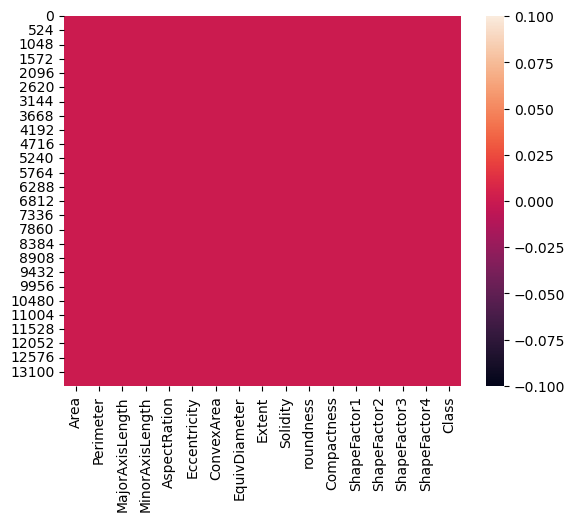

In [17]:
sns.heatmap(df.isnull())

In [18]:
print('Described Column Length:', len(df.describe().columns))
df.describe()

Described Column Length: 16


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
#list the features with unique values

In [19]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Class
['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


In [ ]:
#Checking whether the missing values are present or not in the features

In [20]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value")

No missing value


In [ ]:
#list down the number of unique values in each features

In [21]:
for column in df.columns:
    print(column,df[column].nunique())

Area 12011
Perimeter 13416
MajorAxisLength 13543
MinorAxisLength 13543
AspectRation 13543
Eccentricity 13543
ConvexArea 12066
EquivDiameter 12011
Extent 13535
Solidity 13526
roundness 13543
Compactness 13543
ShapeFactor1 13543
ShapeFactor2 13543
ShapeFactor3 13543
ShapeFactor4 13543
Class 7


In [ ]:
#display the categorical features in the dataset

In [22]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['Class']

In [ ]:
#display the categorical feature with feature name and number of categories in the dataset

In [23]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Class and number of categories are 7


In [24]:
#converting the categorical 'target' variable to numerical datatype

In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Class'] = labelencoder.fit_transform(df['Class'])
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [ ]:
#correlation between the features using heatmap

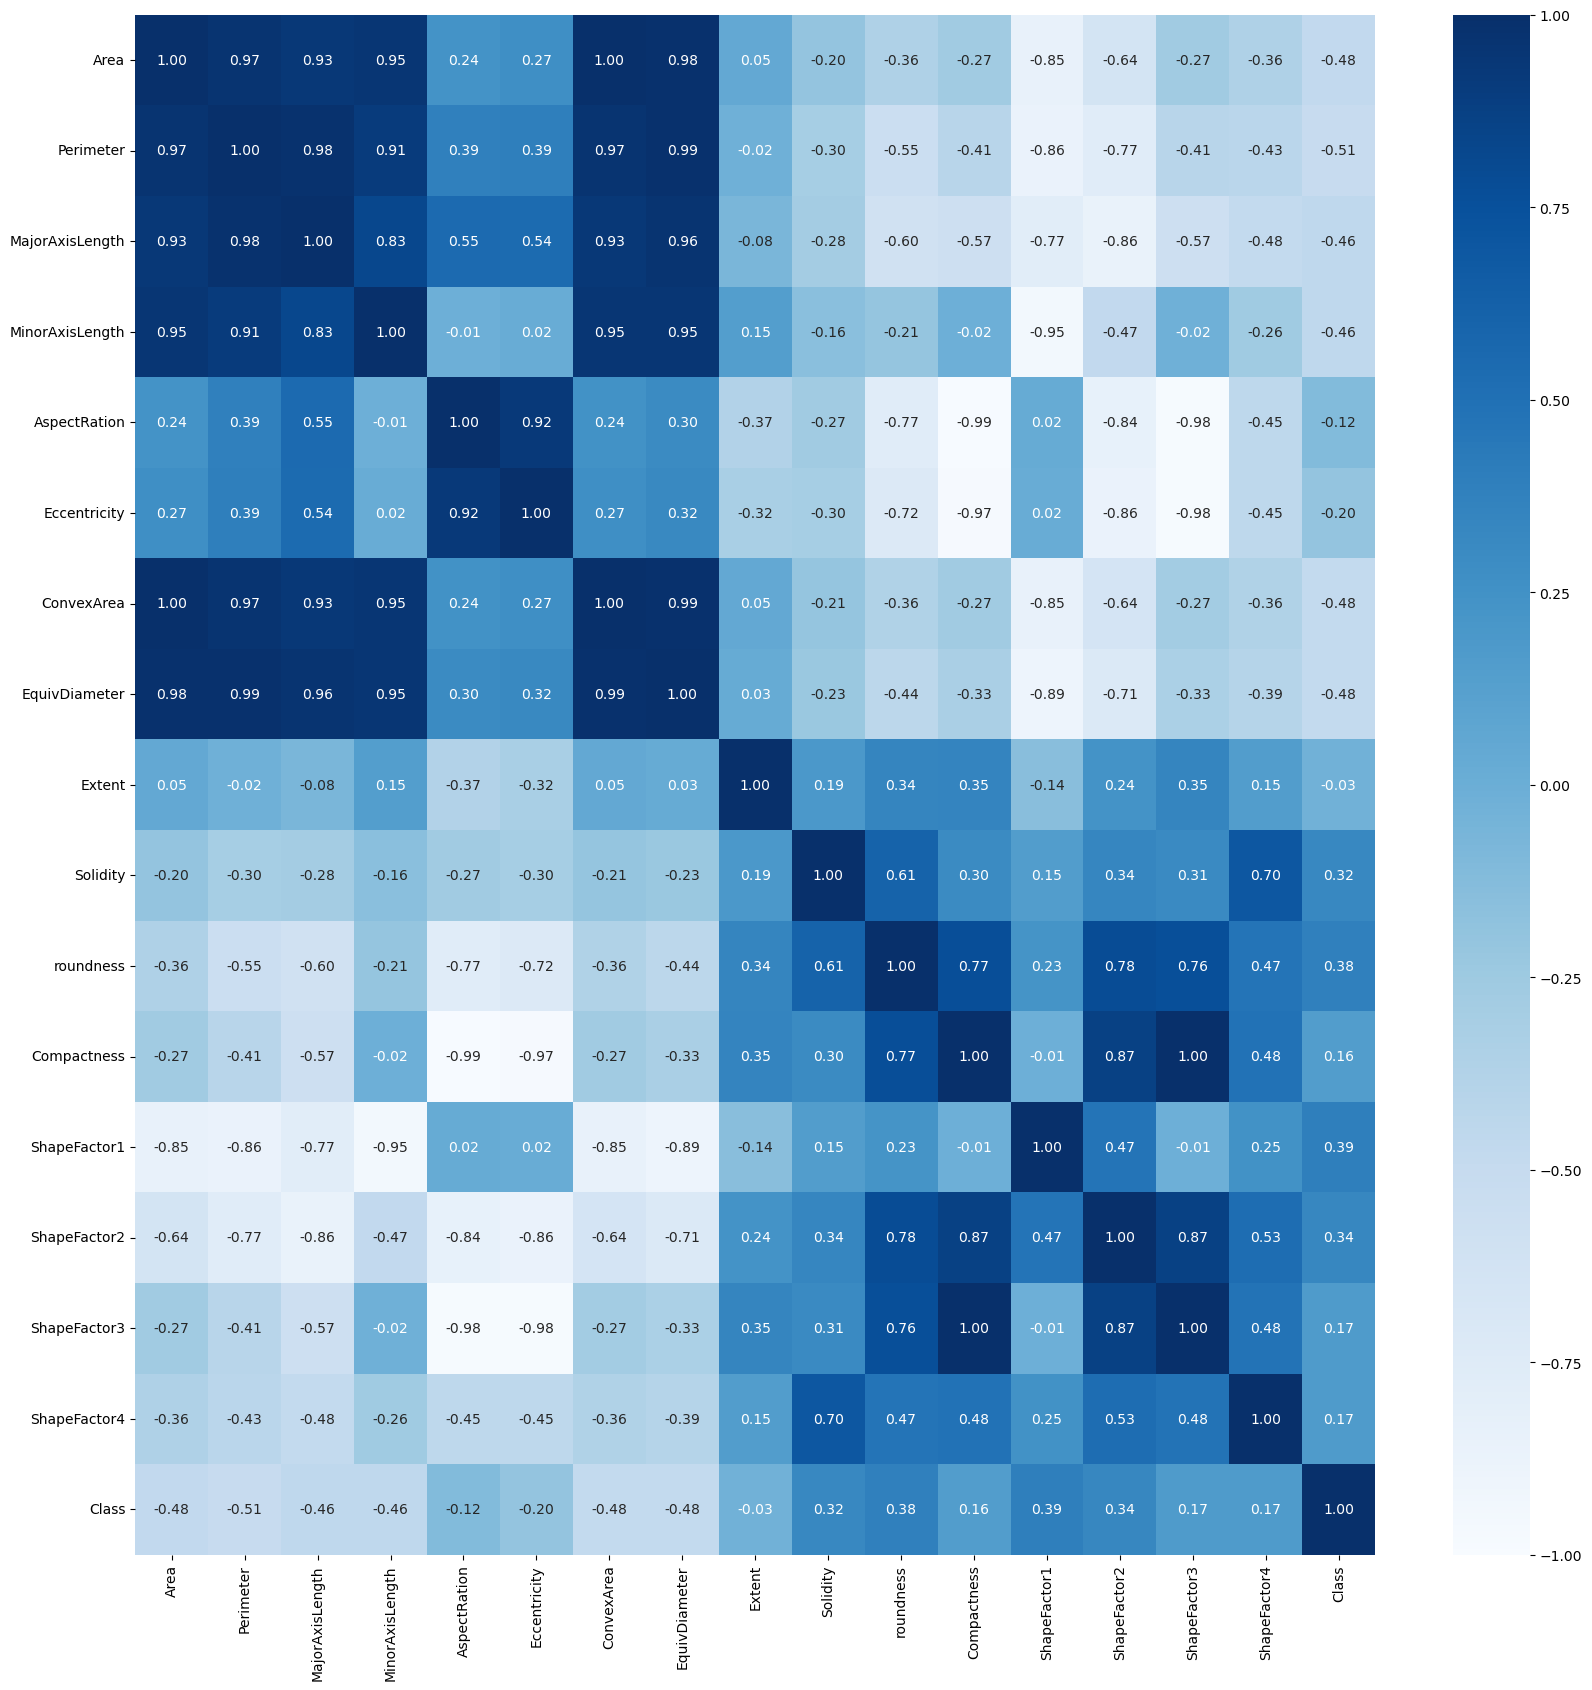

In [26]:
import seaborn as sns
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), 
            annot = True, 
            cmap = "Blues",
            fmt = ".2f",
            vmin = -1.00, vmax = 1.00)
plt.show()

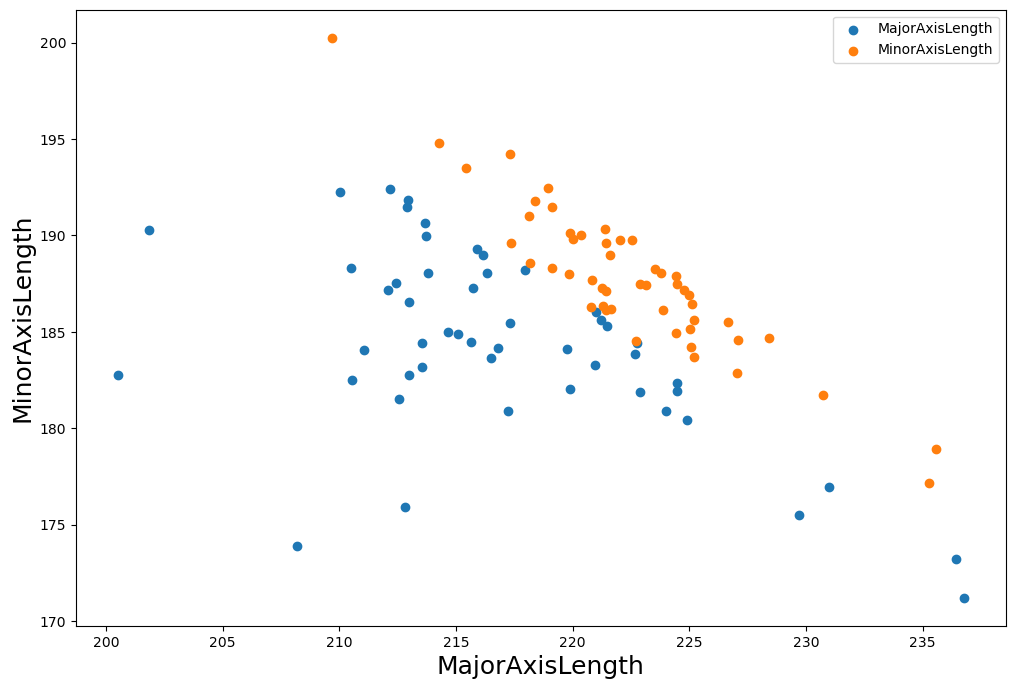

In [27]:
#plotting the features 'MajorAxisLength' and 'MinorAxisLength' of the drybeans

plt.figure(figsize=(12, 8))
plt.scatter(df[:50]['MajorAxisLength'], df[:50]['MinorAxisLength'], label='MajorAxisLength')
plt.scatter(df[50:100]['MajorAxisLength'], df[50:100]['MinorAxisLength'], label='MinorAxisLength')
plt.xlabel('MajorAxisLength', fontsize=18)
plt.ylabel('MinorAxisLength', fontsize=18)
plt.legend()

plt.show()

In [ ]:
#fitting the features and target value with new variables

In [28]:
X = df.drop(['Class'], axis=1)

y = df['Class']

In [ ]:
# using bar chart to display count of each class

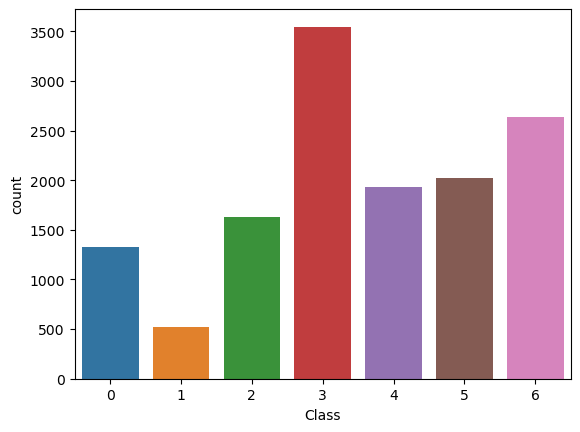

In [29]:
sns.countplot(x=y, data=df)
plt.show()

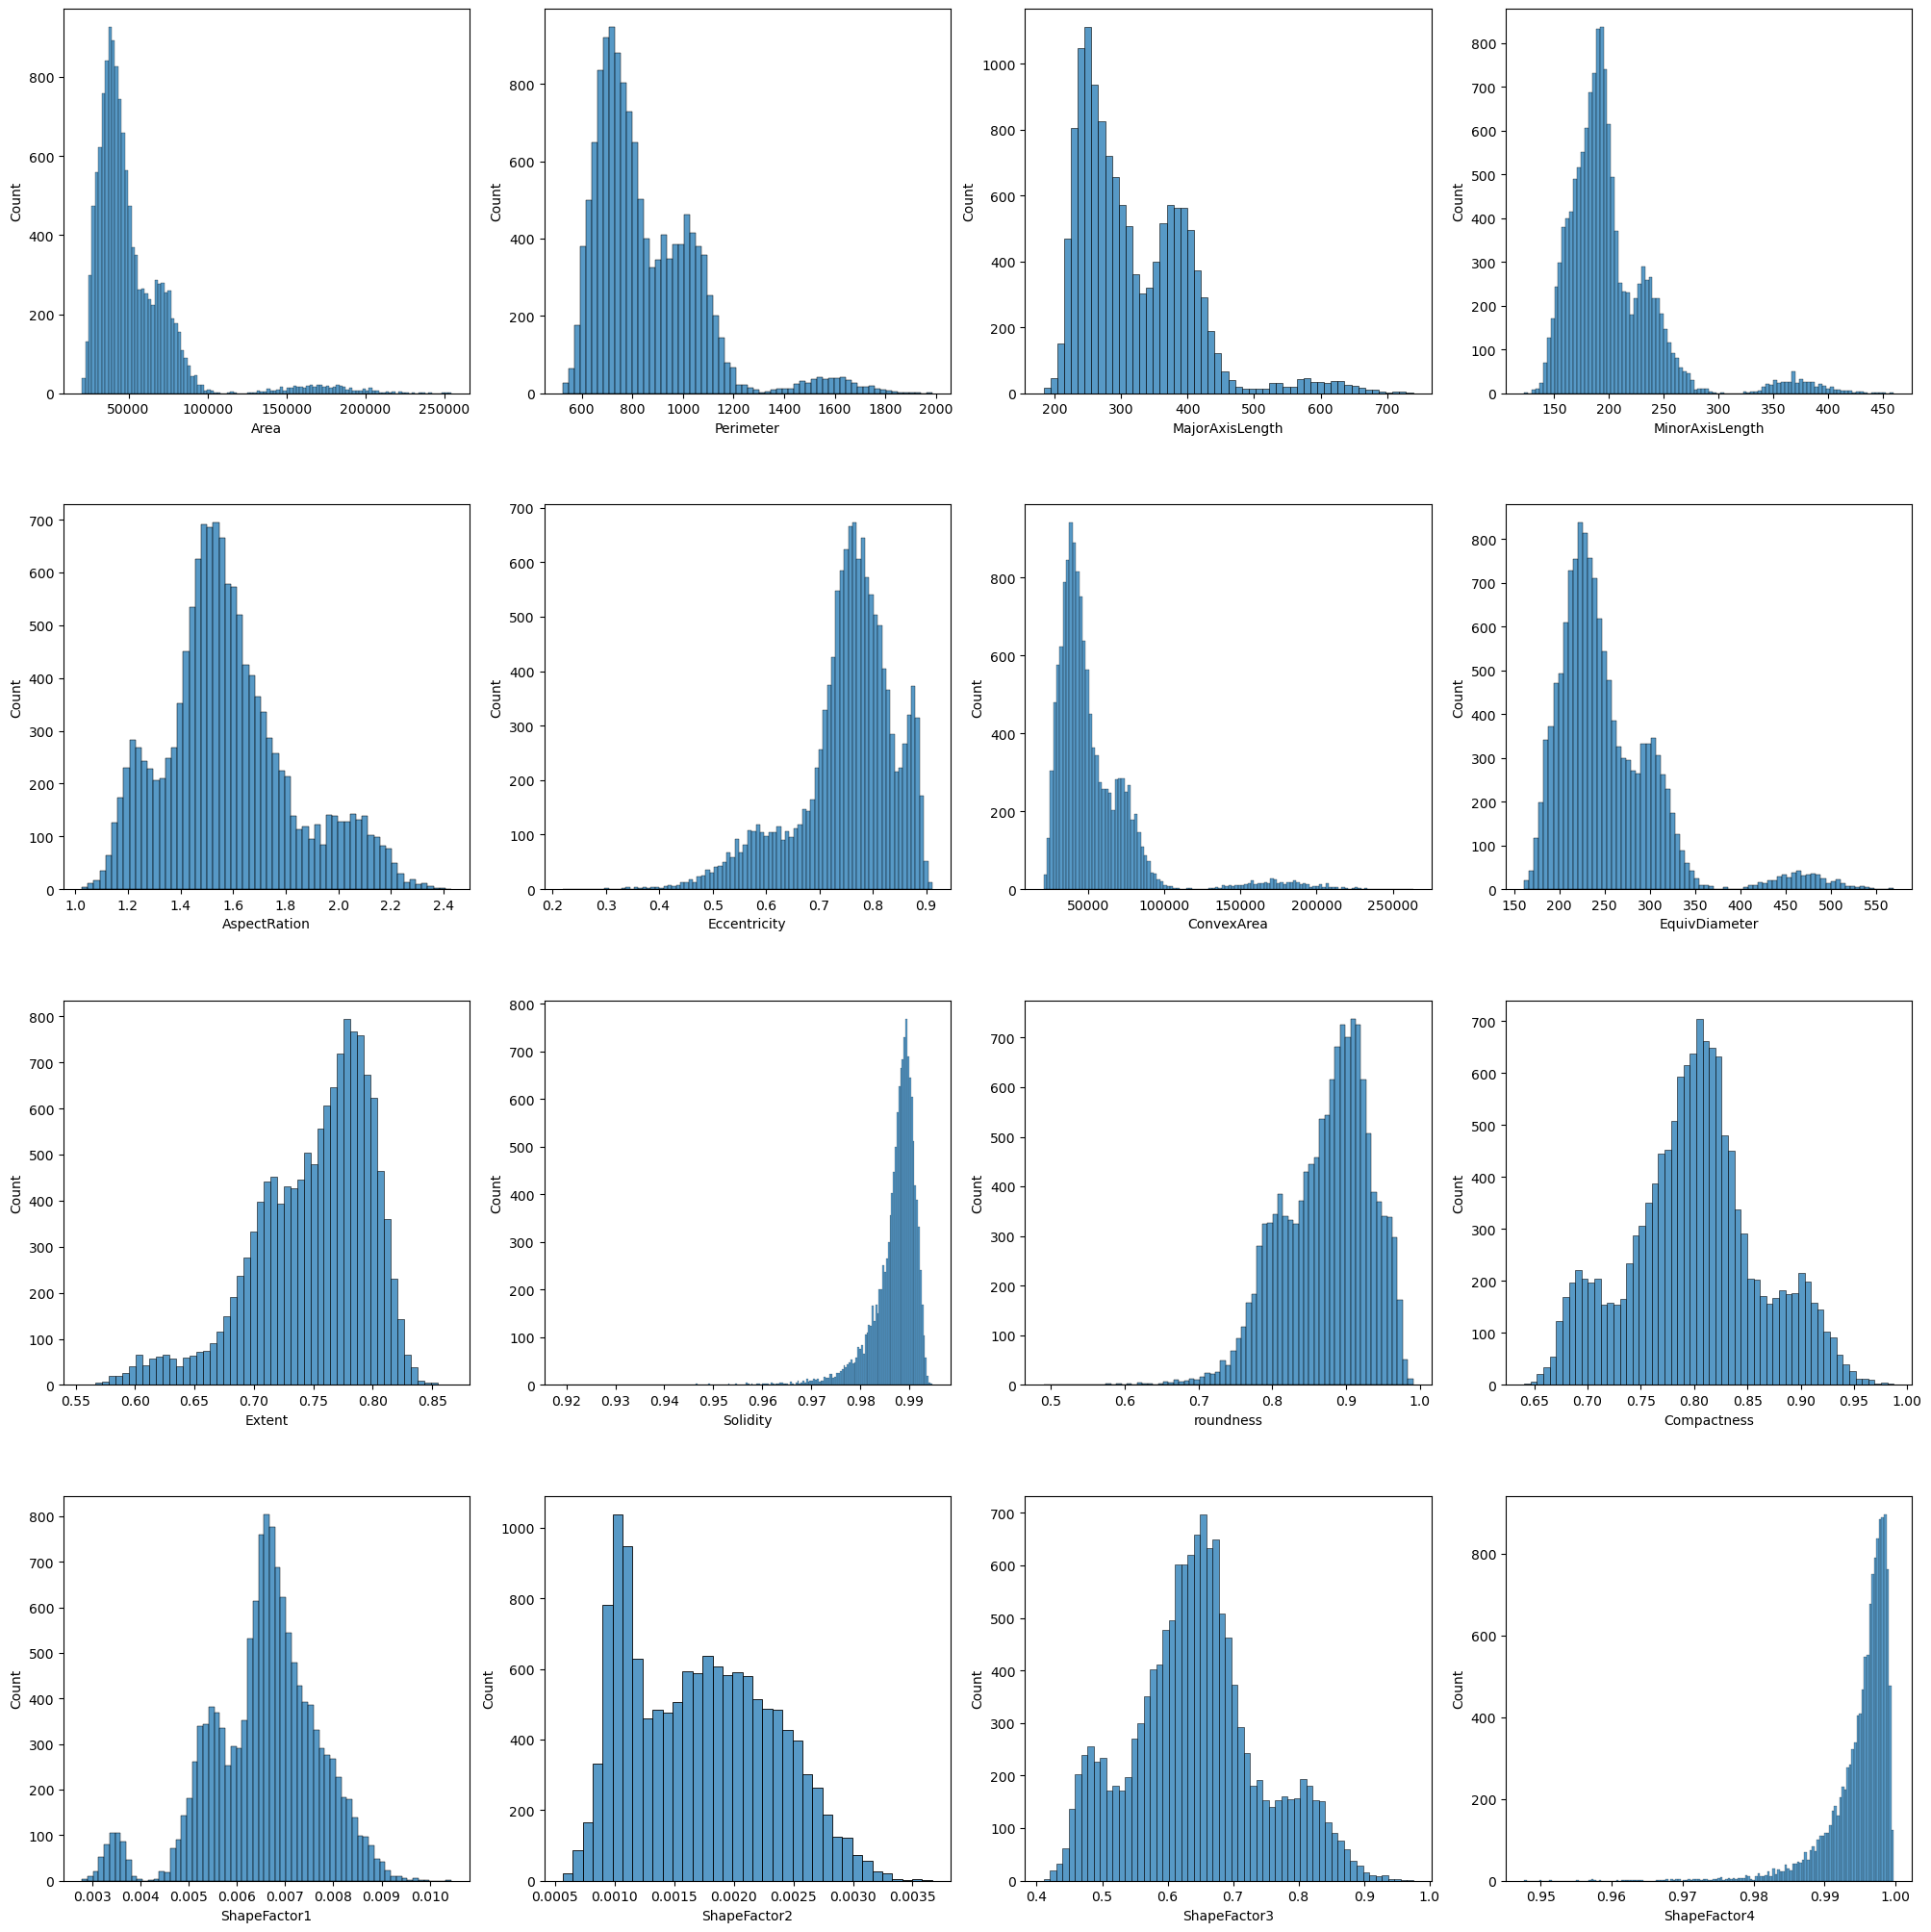

In [30]:
# Plot features value distribution
fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
index = 0

axs = axs.flatten()
for k, v in X.items():
    sns.histplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [31]:
print(df.Class)

0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class, Length: 13611, dtype: int32


In [32]:
# Data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## DECISION TREE 

In [40]:
from sklearn.tree import DecisionTreeClassifier

# np.random.seed(42)

dfclf = DecisionTreeClassifier() 
dfclf.fit(X_train, y_train)
dfclf.score(X_test, y_test)

0.8910381978452497

In [34]:
# DecisionTreeClassifier model with criterion gini index
dfclf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
# fit the model
dfclf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [35]:
y_pred = dfclf.predict(X_test)

In [25]:
#Hyperparameter tuning for Decision tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param = {
    'criterion': ['gini'],
    'max_depth': [i for i in range(20, 101, 10)], # [30, 50, 60, 100]
    'min_samples_leaf': [i for i in range(2, 11, 1)], # [2, 3, 5, 10]
    'min_impurity_decrease': [0.1, 0.2, 0.3, 0.4, 0.5] # [0.1, 0.2, 0.5]
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=6) # default scoring: accuracy_score
grid.fit(X_train, y_train)
print('\n Best DT Classifier:', grid.best_params_, '\n\Best Score:', grid.best_score_)  


 Best DT Classifier: {'criterion': 'gini', 'max_depth': 20, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2} 
\Best Score: 0.7626728266027976


[Text(0.5, 0.875, 'x[2] <= 280.397\ngini = 0.827\nsamples = 9527\nvalue = [927, 361, 1151, 2503, 1340, 1408, 1837]'),
 Text(0.25, 0.625, 'x[12] <= 0.007\ngini = 0.539\nsamples = 4031\nvalue = [4, 0, 0, 2387, 9, 1297, 334]'),
 Text(0.125, 0.375, 'x[14] <= 0.727\ngini = 0.234\nsamples = 1426\nvalue = [4, 0, 0, 74, 1, 1241, 106]'),
 Text(0.0625, 0.125, 'gini = 0.588\nsamples = 166\nvalue = [0, 0, 0, 47, 1, 26, 92]'),
 Text(0.1875, 0.125, 'gini = 0.07\nsamples = 1260\nvalue = [4, 0, 0, 27, 0, 1215, 14]'),
 Text(0.375, 0.375, 'x[1] <= 708.068\ngini = 0.203\nsamples = 2605\nvalue = [0, 0, 0, 2313, 8, 56, 228]'),
 Text(0.3125, 0.125, 'gini = 0.084\nsamples = 2033\nvalue = [0, 0, 0, 1945, 5, 52, 31]'),
 Text(0.4375, 0.125, 'gini = 0.467\nsamples = 572\nvalue = [0, 0, 0, 368, 3, 4, 197]'),
 Text(0.75, 0.625, 'x[14] <= 0.531\ngini = 0.789\nsamples = 5496\nvalue = [923, 361, 1151, 116, 1331, 111, 1503]'),
 Text(0.625, 0.375, 'x[3] <= 215.311\ngini = 0.136\nsamples = 1288\nvalue = [6, 6, 75, 1, 11

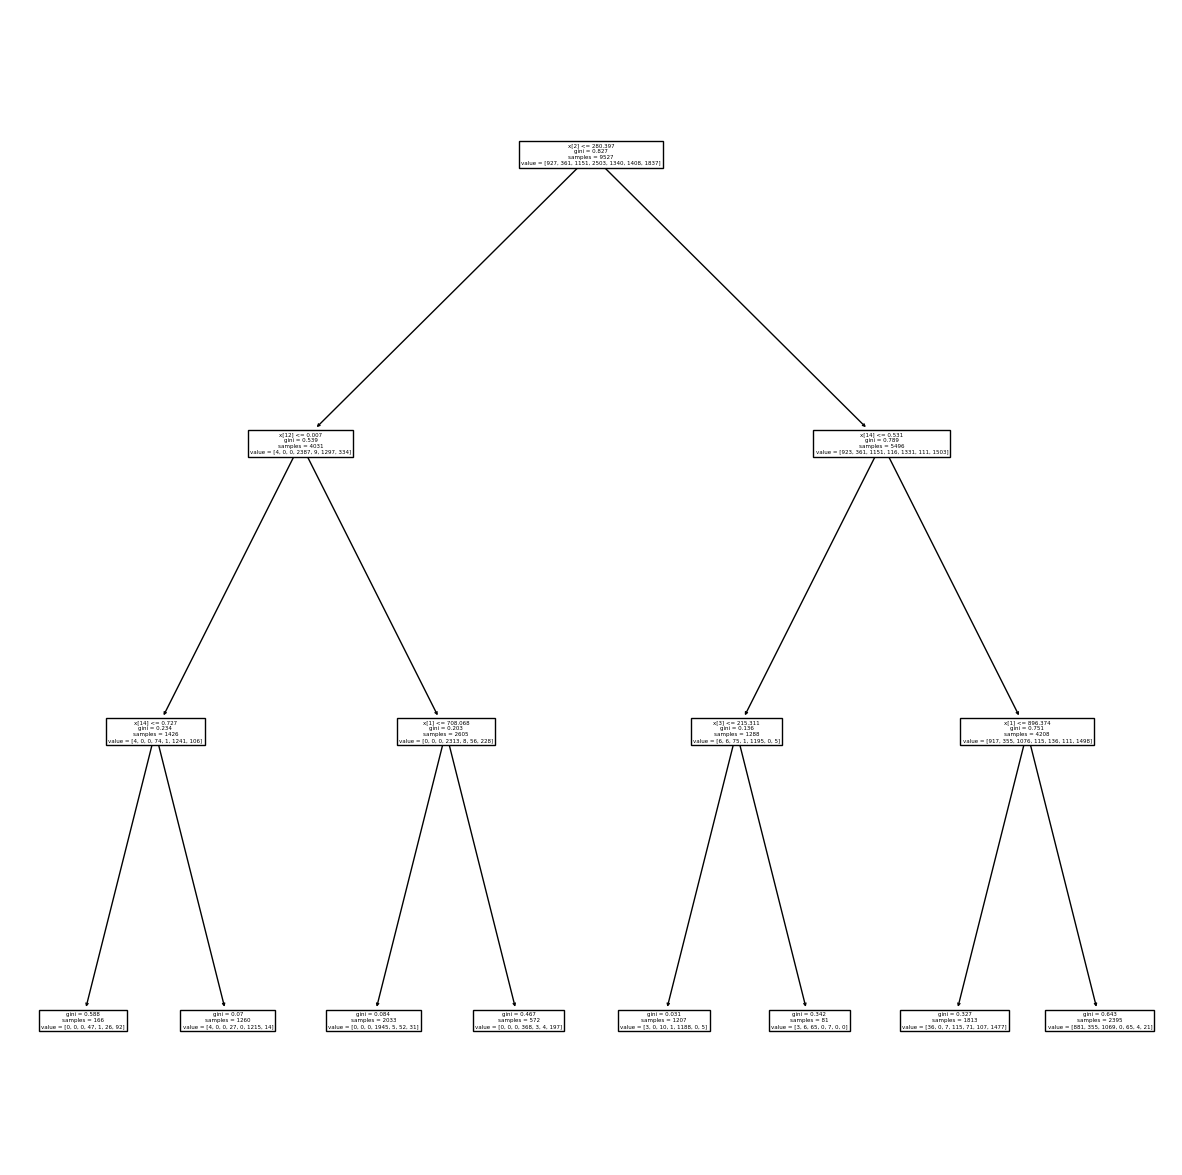

In [28]:
plt.figure(figsize=(15,15))
from sklearn import tree
tree.plot_tree(dfclf)

In [29]:
from sklearn.tree import export_text
r = export_text(dfclf)
print(r)

|--- feature_2 <= 280.40
|   |--- feature_12 <= 0.01
|   |   |--- feature_14 <= 0.73
|   |   |   |--- class: 6
|   |   |--- feature_14 >  0.73
|   |   |   |--- class: 5
|   |--- feature_12 >  0.01
|   |   |--- feature_1 <= 708.07
|   |   |   |--- class: 3
|   |   |--- feature_1 >  708.07
|   |   |   |--- class: 3
|--- feature_2 >  280.40
|   |--- feature_14 <= 0.53
|   |   |--- feature_3 <= 215.31
|   |   |   |--- class: 4
|   |   |--- feature_3 >  215.31
|   |   |   |--- class: 2
|   |--- feature_14 >  0.53
|   |   |--- feature_1 <= 896.37
|   |   |   |--- class: 6
|   |   |--- feature_1 >  896.37
|   |   |   |--- class: 2



In [32]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[  0   0 375   0   0   1  19]
 [  0   0 161   0   0   0   0]
 [  0   0 470   0   6   1   2]
 [  0   0   0 947   0  15  81]
 [  0   0  34   6 524   0  24]
 [  0   0   4  42   0 518  55]
 [  0   0   9  91   2   4 693]]


Text(0.5, 1.0, 'Confusion Matrix ')

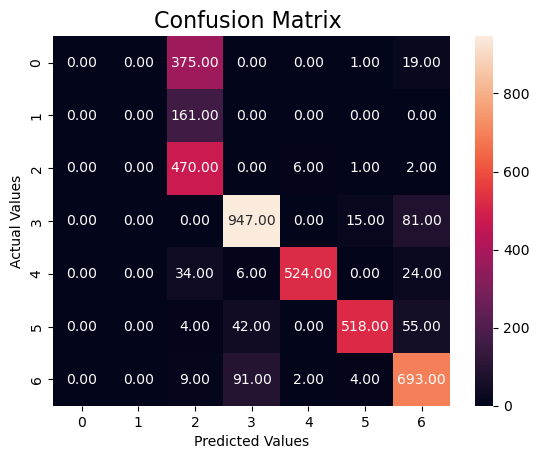

In [33]:
cm = confusion_matrix(y_test, y_pred)
confusion_plot = sns.heatmap(cm, annot=True,fmt=".2f")
confusion_plot.set_xlabel('Predicted Values')
confusion_plot.set_ylabel('Actual Values')
confusion_plot.set_title('Confusion Matrix ', size=16)

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.98      0.45      0.61      1053
           3       0.91      0.87      0.89      1086
           4       0.89      0.98      0.94       532
           5       0.84      0.96      0.89       539
           6       0.87      0.79      0.83       874

    accuracy                           0.77      4084
   macro avg       0.64      0.58      0.59      4084
weighted avg       0.91      0.77      0.81      4084



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Bagging(Bootstrap Aggregating): BaggingClassifier

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=20, bootstrap=True)
dt_bag_clf.fit(X_train, y_train)

print("DecisionTree_BAG's training accuracy: %.2f%%" % (100 * dt_bag_clf.score(X_train, y_train)))
print("DecisionTree_BAG's test accuracy: %.2f%%" % (100 * dt_bag_clf.score(X_test, y_test)))

DecisionTree_BAG's training accuracy: 99.82%
DecisionTree_BAG's test accuracy: 92.02%


## K-NEAREST NEIGHBOR

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0:5])

[[-0.84074853 -1.1433189  -1.30659814 -0.63115304 -1.56505251 -2.18572039
  -0.84145059 -1.0633406   0.28908744  0.36761343  1.42386707  1.8391164
   0.68078638  2.40217287  1.92572347  0.83837103]
 [-0.82918764 -1.01392388 -1.39591111 -0.43444458 -1.96978438 -3.68603953
  -0.82610154 -1.04421674  0.69747682 -0.46290658  0.23105404  2.49544929
   0.3679669   3.10089314  2.68970162  0.77113842]
 [-0.80715717 -1.07882906 -1.25235661 -0.58573461 -1.51429132 -2.04533608
  -0.80870371 -1.00808399  0.57819522  0.51841687  1.25286494  1.76484275
   0.60312889  2.23509147  1.84135576  0.91675514]
 [-0.78574055 -0.97721522 -1.27882531 -0.43929028 -1.74161826 -2.74221072
  -0.77397521 -0.97333689  0.67125962 -2.24176709  0.51504917  2.08171549
   0.40171781  2.51507474  2.20424996 -0.19798544]
 [-0.78123896 -1.09738406 -1.38047091 -0.26666336 -2.11799263 -4.53502829
  -0.78428628 -0.96607974  0.47602028  0.80477244  1.8749924   2.76533032
   0.11826829  3.2709825   3.01346221  0.93963989]]


In [44]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn_clf_sk_2 = KNeighborsClassifier(n_neighbors=2)
knn_clf_sk_2.fit(X_train, y_train)
knn_clf_sk_2.score(X_test, y_test)

0.7071498530852106

In [46]:
knn_clf_sk_3 = KNeighborsClassifier(n_neighbors=3)
knn_clf_sk_3.fit(X_train, y_train)
knn_clf_sk_3.score(X_test, y_test)

0.7242899118511263

In [47]:
knn_clf_sk_3 = KNeighborsClassifier(n_neighbors=3)
knn_clf_sk_3.fit(X_train, y_train)
sfs_backward = SequentialFeatureSelector(knn_clf_sk_3, n_features_to_select=3, direction="backward")
sfs_backward = sfs_backward.fit(X_train, y_train)
print(sfs_backward.get_support())

[False  True  True False False False False  True False False False False
 False False False False]


In [48]:
knn_clf_sk_4 = KNeighborsClassifier(n_neighbors=4)
knn_clf_sk_4.fit(X_train, y_train)
knn_clf_sk_4.score(X_test, y_test)

0.7157198824681684

In [49]:
knn_clf_sk_5 = KNeighborsClassifier(n_neighbors=5)
knn_clf_sk_5.fit(X_train, y_train)
knn_clf_sk_5.score(X_test, y_test)

0.7113124387855044

In [50]:
knn_4d = KNeighborsClassifier(n_neighbors=3)
knn_4d = knn_4d.fit(X_train, y_train)
print("KNN Accuracy %d-D by Backward FS: %.2f%%" %(4, 100 * knn_4d.score(X_train, y_train)))

X_3d_backward = sfs_backward.transform(X)
knn_3d = KNeighborsClassifier(n_neighbors=3)
knn_3d = knn_3d.fit(X_3d_backward, y)
print("KNN Accuracy %d-D by Backward FS: %.2f%%" %(3, 100 * knn_3d.score(X_3d_backward, y)))

KNN Accuracy 4-D by Backward FS: 84.79%
KNN Accuracy 3-D by Backward FS: 94.01%


In [51]:
sfs_backward_2d = SequentialFeatureSelector(knn_clf_sk_2, n_features_to_select=2, direction="backward")
sfs_backward_2d = sfs_backward_2d.fit(X, y)
print(sfs_backward_2d.get_support())

[False  True  True False False False False False False False False False
 False False False False]


In [52]:
X_2d_backward = sfs_backward_2d.transform(X)
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d = knn_2d.fit(X_2d_backward, y)
print("KNN Accuracy %d-D by Backward FS: %.2f%%" %(2, 100 * knn_2d.score(X_2d_backward, y)))

KNN Accuracy 2-D by Backward FS: 91.46%


In [53]:
#hyperparametertuning for KNN

In [54]:
best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn_clf_sk = KNeighborsClassifier(n_neighbors=k)
    knn_clf_sk.fit(X_train, y_train)
    score = knn_clf_sk.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score

print("best_k = " + str(best_k))
print("best_score = " + str(best_score))

best_k = 1
best_score = 0.7382468168462292


In [55]:
y_pred = knn_clf_sk_3.predict(X_test)

y_pred

array([5, 0, 5, ..., 4, 5, 4])

In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[187   0 155   0  38   0  15]
 [  0 161   0   0   0   0   0]
 [160   0 289   0  27   1   2]
 [  0   0   0 924   1  54  64]
 [ 54   0  23  19 403   2  87]
 [  3   0   1 117   8 396  94]
 [ 10   0   3 108  52  28 598]]

True Positives(TP) =  187

True Negatives(TN) =  161

False Positives(FP) =  0

False Negatives(FN) =  0


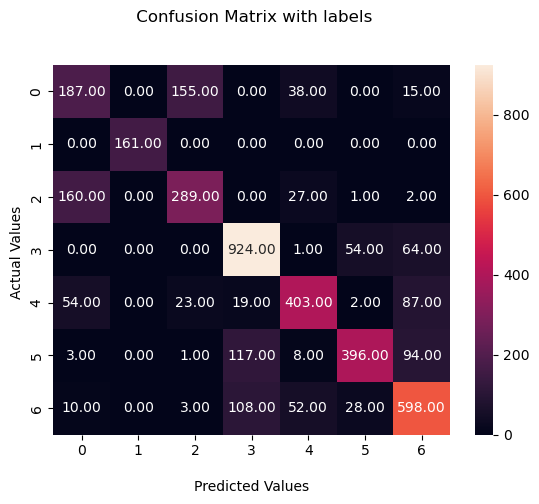

In [57]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, fmt=".2f" )

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values', )
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.47      0.46       395
           1       1.00      1.00      1.00       161
           2       0.61      0.60      0.61       479
           3       0.79      0.89      0.84      1043
           4       0.76      0.69      0.72       588
           5       0.82      0.64      0.72       619
           6       0.70      0.75      0.72       799

    accuracy                           0.72      4084
   macro avg       0.73      0.72      0.72      4084
weighted avg       0.73      0.72      0.72      4084



## RANDOM FOREST

In [59]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((10208, 16), (3403, 16))

In [60]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
y_pred = rfc.predict(X_test)
y_pred

array([5, 0, 5, ..., 2, 6, 6])

In [62]:
print (rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.9215398178078167


In [63]:
#Hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

param_rf = {
    "criterion": ["gini", "entropy"], 
    "n_estimators": list(range(200, 1001, 200))
}
 
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_rf, cv=5)
grid_rf.fit(X_train, y_train)
print('Best RF Classifier:', grid_rf.best_params_, 'Best Score:', grid_rf.best_score_)

Best RF Classifier: {'criterion': 'entropy', 'n_estimators': 800} Best Score: 0.9234910581847829


In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,rfc.predict(X_test))
cm

array([[311,   0,  21,   0,   1,   3,   8],
       [  0, 142,   0,   0,   0,   0,   0],
       [ 18,   0, 375,   0,   5,   2,   2],
       [  0,   0,   0, 784,   2,  13,  52],
       [  3,   0,   6,   3, 467,   0,   7],
       [  3,   0,   0,  18,   0, 481,  11],
       [  2,   0,   1,  68,   9,   9, 576]], dtype=int64)

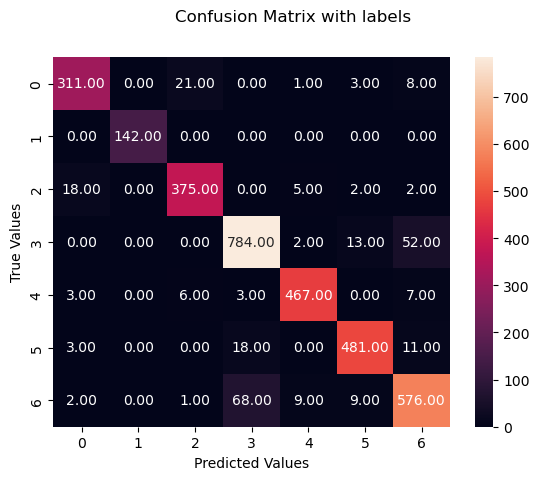

In [65]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt=".2f")

plt.suptitle('Confusion Matrix with labels\n\n');
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [34]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       344
           1       1.00      1.00      1.00       142
           2       0.93      0.93      0.93       402
           3       0.90      0.92      0.91       851
           4       0.96      0.96      0.96       486
           5       0.95      0.94      0.94       513
           6       0.88      0.87      0.87       665

    accuracy                           0.92      3403
   macro avg       0.93      0.93      0.93      3403
weighted avg       0.92      0.92      0.92      3403



In [3]:
# Comparing accuracies

In [67]:
print('Decision tree: ',(dfclf.score(X_test, y_test)*100), '%')
print('\n')
print('KNN: ',(knn_clf_sk_3.score(X_test, y_test)*100),'%')
print('\n')
print('Random Forest: ', (rfc.score(X_test, y_test)*100),'%')

Decision tree:  89.30355568615927 %


KNN:  71.90714075815457 %


Random Forest:  92.15398178078166 %
